In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/436.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/355.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/476.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/327.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/446.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/425.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/426.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/440.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/359.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/361.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/443.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/334.jpg
/kaggle/input/withwithout-mask/maskdata/maskdata/test/without_mask/463.jpg
/kaggle/input/withwithout

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
train_dir = '/kaggle/input/withwithout-mask/maskdata/maskdata/train'
test_dir = '/kaggle/input/withwithout-mask/maskdata/maskdata/test'

In [5]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [6]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training'
)

val_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 42, 
    subset = 'validation'
)

test_images = test_generator.flow_from_directory(
    test_dir, 
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = False
)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


2022-12-07 04:27:13.803532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 04:27:13.804804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 04:27:13.973618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 04:27:13.974741: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 04:27:13.978317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080  

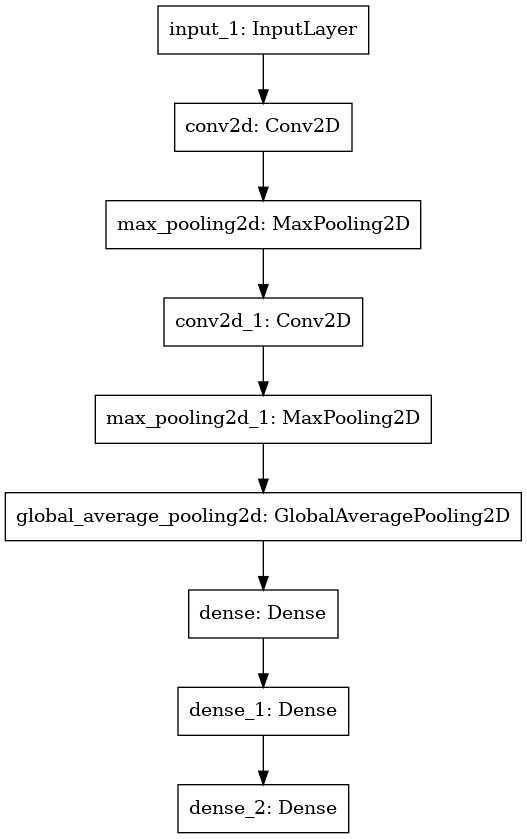

In [7]:
inputs = tf.keras.Input(shape = (224, 224, 3))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
    ]
)

2022-12-07 04:27:19.482526: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-07 04:27:21.672556: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


16/16 [==============================] - 14s 303ms/step - loss: 0.6821 - accuracy: 0.5538 - val_loss: 0.6771 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 3s 179ms/step - loss: 0.6733 - accuracy: 0.5558 - val_loss: 0.6683 - val_accuracy: 0.5610
Epoch 3/100
16/16 [==============================] - 3s 161ms/step - loss: 0.6633 - accuracy: 0.5801 - val_loss: 0.6548 - val_accuracy: 0.5935
Epoch 4/100
16/16 [==============================] - 3s 163ms/step - loss: 0.6526 - accuracy: 0.6247 - val_loss: 0.6937 - val_accuracy: 0.4553
Epoch 5/100
16/16 [==============================] - 3s 157ms/step - loss: 0.6595 - accuracy: 0.5882 - val_loss: 0.6283 - val_accuracy: 0.6585
Epoch 6/100
16/16 [==============================] - 3s 211ms/step - loss: 0.6180 - accuracy: 0.6795 - val_loss: 0.6140 - val_accuracy: 0.6341
Epoch 7/100
16/16 [==============================] - 3s 167ms/step - loss: 0.6138 - accuracy: 0.6694 - val_loss: 0.5845 - val_accuracy: 0.7967
Epoch 8/10

In [9]:
results = model.evaluate(test_images, verbose = 0)
print(" Loss: {:.5f}".format(results[0]))
print(" Accuracy: {:.3f}%".format(results[1] * 100))

 Loss: 0.58418
 Accuracy: 73.737%


In [10]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

sample_images = sample_generator.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 42
)

Found 198 images belonging to 2 classes.


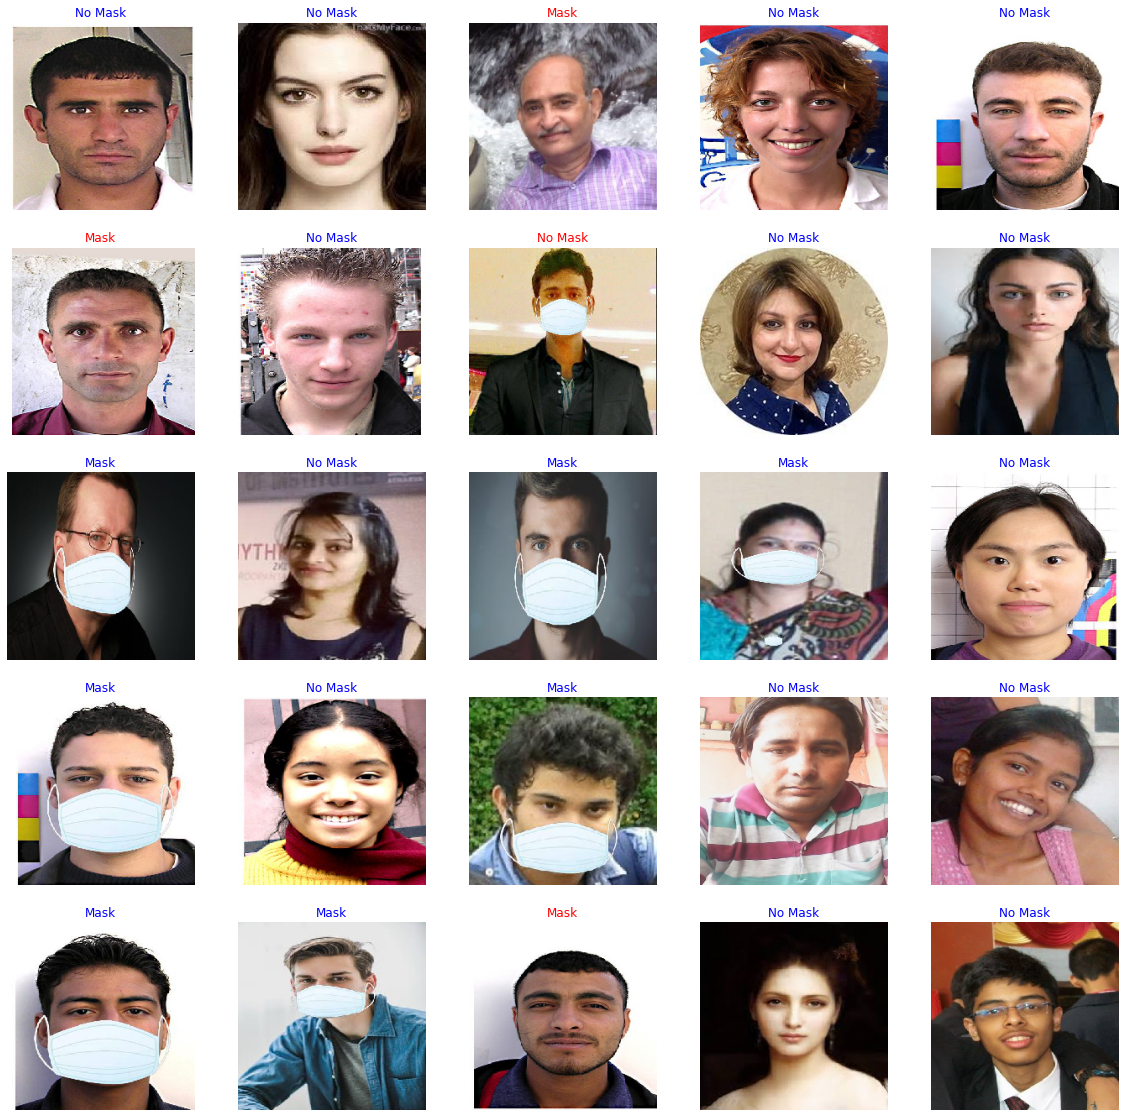

In [26]:
samples = sample_images.next()

predictions = np.squeeze(model.predict(samples[0])  >=0.5).astype(int)
labels = samples[1].astype(int)

plt.figure(figsize = (20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("No Mask" if predictions[i] == 1 else "Mask"), color = ("blue" if labels[i] == predictions[i] else 'red'))
    
plt.show()